In [1]:
from qiskit import *

import numpy as np
import scipy.linalg
import scipy.io
import itertools
import matplotlib.pyplot as plt

from qiskit.visualization import *
from qiskit.extensions import UnitaryGate

# custom utility functions
from util import *
from qetu import *

In [2]:
mat_step_func_02 = scipy.io.loadmat('phase_angles/step_function_02.mat')['phi_proc']
step_function_02_qsp_angles = list(itertools.chain.from_iterable(mat_step_func_02))

In [3]:
H = np.diag(np.array([np.arccos(0.1), np.arccos(0.3), np.arccos(0.6), np.arccos(0.9)]))
array_to_latex(H)

<IPython.core.display.Latex object>

In [3]:
import scipy as sp
import numpy as np

I = sp.sparse.csr_array(np.array([[1, 0], [0, 1]])).toarray()
X = sp.sparse.csr_array(np.array([[0, 1], [1, 0]])).toarray()
Y = sp.sparse.csr_array(np.array([[0, -1j], [1j, 0]])).toarray()
Z = sp.sparse.csr_array(np.array([[1, 0], [0, -1]])).toarray()

H = 1.09*np.kron(I,I) + 0.08*np.kron(X,Z) + 0.22*np.kron(X,Y) + 0.14*np.kron(Z,I) -0.2*np.kron(Y,Z)
array_to_latex(H)

<IPython.core.display.Latex object>

In [4]:
U = expm(-1j*H)
V = scipy.linalg.block_diag(U.conjugate().transpose(), U)
V_gate = UnitaryGate(V)
q = QuantumRegister(3, 'q')
V_qc = QuantumCircuit(q)
V_qc.append(V_gate, q)

actual eigenvalues: [ 8.99999910e-01  3.26074872e-07 -3.45269638e-09 -3.58924318e-07]


C:\Users\thilo\AppData\Roaming\Python\Python311\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
C:\Users\thilo\AppData\Roaming\Python\Python311\site-packages\matplotlib\collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


Text(0, 0.5, 'U = F(cos(λ))')

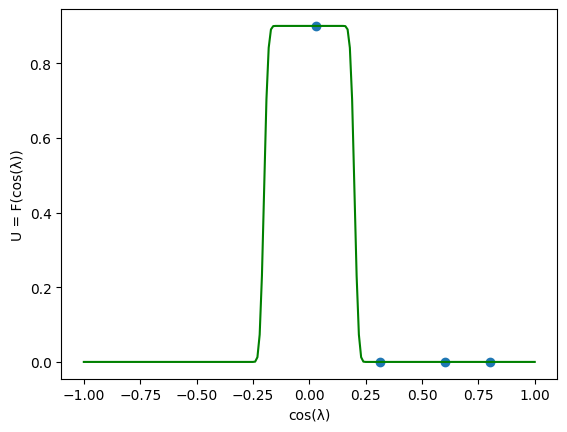

In [5]:
U_qc = QETU(V_qc, convert_Zrot_to_Xrot(step_function_02_qsp_angles))
U_qetu = get_matrix(U_qc)[0:4, 0:4]
λ = np.linalg.eigvals(H)
F_λ = np.linalg.eigvals(U_qetu).real * -1
print("actual eigenvalues: " + str(F_λ))

x_list = np.linspace(-1, 1, 201)
QSP_list = []
for x in x_list:
    QSP_circuit = QSP(step_function_02_qsp_angles, x)
    result = get_matrix(QSP_circuit)[0,0]
    QSP_list.append(result)

plt.plot(x_list, QSP_list, "g", label="Re[Poly(a)]")
plt.scatter(x=np.cos(λ), y=F_λ)
plt.xlabel("cos(λ)")
plt.ylabel("U = F(cos(λ))")

In [6]:
num_qubits = U_qc.num_qubits - 1
initial_state = Statevector.from_label("0++")
final_state = initial_state.evolve(U_qc)
final_state = final_state.data.real * -1
#final_state = final_state.data[::-1]
final_state = final_state[0:2**num_qubits]

from IPython.display import Latex
from qiskit.visualization import state_visualization

prefix = "$$\\begin{align}"
suffix = "\\end{align}$$"
state_to_latex = state_visualization._state_to_latex_ket(initial_state.data, max_size = 128)

Latex(prefix + state_to_latex + suffix)

<IPython.core.display.Latex object>

In [7]:
prefix = "$$\\begin{align}"
suffix = "\\end{align}$$"
state_to_latex = state_visualization._state_to_latex_ket(final_state, max_size = 128)

Latex(prefix + state_to_latex + suffix)

<IPython.core.display.Latex object>

In [21]:
# Diagonalize the Hamiltonian
λ, v = np.linalg.eigh(H)
# Find the ground state
ground_state_index = np.argmin(np.cos(λ))
ground_state_energy = λ[ground_state_index]
ground_state_vector = v[:, ground_state_index]

print("Ground state energy:", ground_state_energy)
print("Ground state vector:", ground_state_vector)

Ground state energy: 1.5398888751680806
Ground state vector: [-0.57253558+0.00000000e+00j -0.57253558-3.46944695e-17j
 -0.07764657+4.07644479e-01j  0.07764657-4.07644479e-01j]


In [22]:
prefix = "$$\\begin{align}"
suffix = "\\end{align}$$"
state_to_latex = state_visualization._state_to_latex_ket(ground_state_vector, max_size = 128)

Latex(prefix + state_to_latex + suffix)

<IPython.core.display.Latex object>

In [23]:
initial_overlap = abs(np.vdot(initial_state.data[0:2**num_qubits] / scipy.linalg.norm(initial_state.data[0:2**num_qubits]), ground_state_vector))**2
print(initial_overlap)

0.32779698928301704


Calculate the success probability

In [24]:
success_probability = scipy.linalg.norm(final_state)**2
print(success_probability)

0.17425575810192306


Calculate the overlap between the ground state vector and the prepared state: $\lvert \braket{\psi|\psi_0} \rvert^2$

In [25]:
overlap = abs(np.vdot(final_state / scipy.linalg.norm(final_state), ground_state_vector))**2
print(overlap)

0.6551694381184837


In [26]:
from IPython.display import Latex
from qiskit.visualization import state_visualization

prefix = "$$\\begin{align}"
suffix = "\\end{align}$$"
state_to_latex = state_visualization._state_to_latex_ket(ground_state_vector.data, max_size = 128)

Latex(prefix + state_to_latex + suffix)

<IPython.core.display.Latex object>

In [27]:
from IPython.display import Latex
from qiskit.visualization import state_visualization

prefix = "$$\\begin{align}"
suffix = "\\end{align}$$"
state_to_latex = state_visualization._state_to_latex_ket(final_state.data, max_size = 128)

Latex(prefix + state_to_latex + suffix)

<IPython.core.display.Latex object>